In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelNormalEquation
from MachineLearningModel import RegressionModelGradientDescent


# Assignment 2

**name:**   Yi Shu Yang

**email:**  yy222cm@student.lnu.se

## Lecture 2 - Part 2

1. Read the dataset and store the values in the variables.

In [2]:
#--- Write your code here ---#
csv = np.genfromtxt("housing-boston.csv",delimiter=",",skip_header=1)
Xe = csv[:,:2]
y = csv[:,2]

2. Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

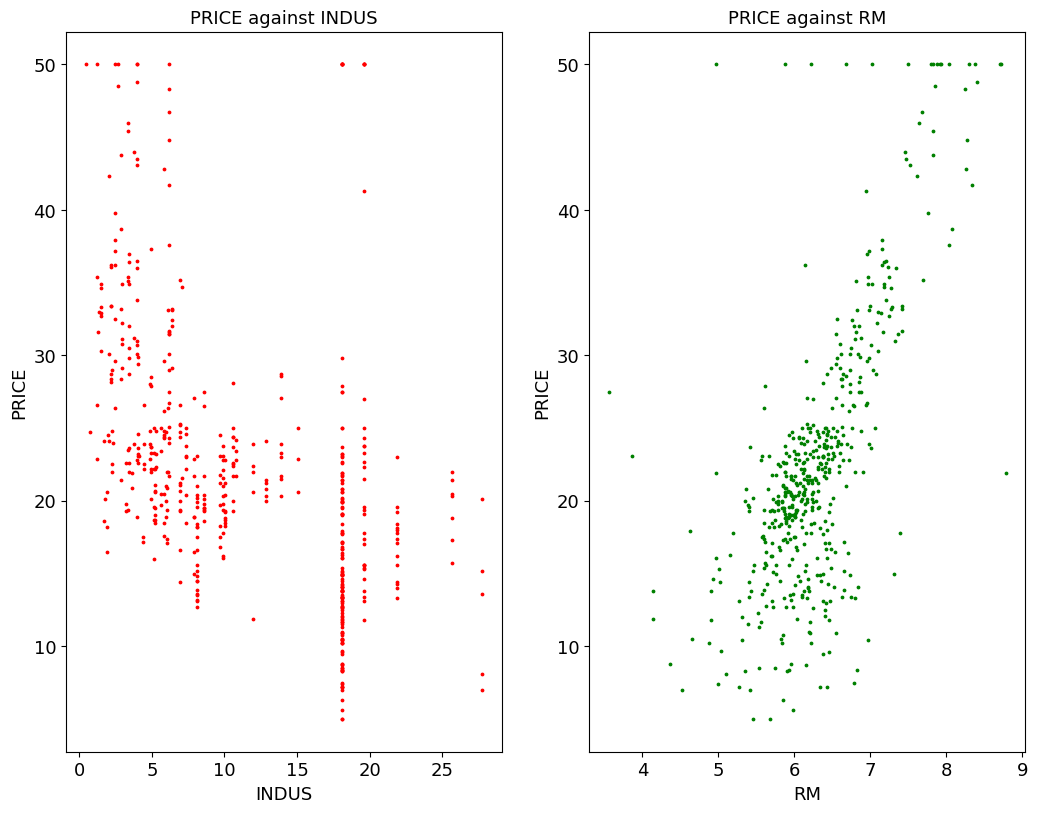

In [3]:
#--- Write your code here ---#
X_label = ["INDUS","RM"]
color = ["red","green"]
plt.figure()
for i in range(1,3,1):
    plt.subplot(1,2,i)
    plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    plt.title(f"PRICE against {X_label[i-1]}",fontsize = 13)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel(X_label[i-1],fontsize = 13)
    plt.ylabel("PRICE",fontsize = 13)
    plt.scatter(x=Xe[:,i-1],y=y,s=3,c=color[i-1])
plt.show()


3. Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [4]:
#--- Write your code here ---#



###    ~The values for beta.
model=RegressionModelNormalEquation(1)
model.fit(Xe,y)
print(model.beta)
print("[beta_1        beta_2        beta_3    ]")
print("")
print("")
###    ~The cost.
cost = model.evaluate(Xe,y)
print("The cost is the following:")
print(cost)
print("")
print("")
###    ~The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575,respectively.
Xnew = np.array([(2.31,6.575)])
predict = model.predict(Xnew)
print("The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575, respectively is:")
print(predict[0])

[-22.89831573  -0.33471389   7.82205511]
[beta_1        beta_2        beta_3    ]


The cost is the following:
39.145483211465084


The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575, respectively is:
27.75850754879821


4. Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---- Your answers here ----

In [5]:
#--- Write your code here ---#
#    normalization
X1 = Xe[:,0]
X2 = Xe[:,1]
mu1 = np.mean(X1)
mu2 = np.mean(X2)
sd1 = np.std(X1)
sd2 = np.std(X2)
X_normal = []
for i in range(len(X1)):
    X_normal.append([(X1[i]-mu1)/sd1,(X2[i]-mu2)/sd2])
X_normal = np.array(X_normal)
###    ~The values for beta.
model=RegressionModelNormalEquation(1)
model.fit(X_normal,y)
print(model.beta)
print("[beta_1      beta_2       beta_3    ]")
print("")
print("")
###    ~The cost.
cost = model.evaluate(X_normal,y)
print("The cost is the following:")
print(cost)
print("")
print("")
###    ~The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575,respectively.
Xnew = np.array([((2.31-mu1)/sd1,(6.575-mu2)/sd2)])
predict = model.predict(Xnew)
print("The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575, respectively is:")
print(predict[0])
print("")
print("")
print("From here it is easy to see that predicted value remains the same but beta values change.")


[22.53280632 -2.29398525  5.49047659]
[beta_1      beta_2       beta_3    ]


The cost is the following:
39.14548321146509


The predicted value for an instance with values for INDUS and RM equals 2.31, 6.575, respectively is:
27.758507548798477


From here it is easy to see that predicted value remains the same but beta values change.


Explanation!!!!!!!!!!!!!!!!!

Beta changes because the training input features change. Before is model.fit(Xe,y), but now is model.fit(X_normal,y). This means we will get a different beta vector since features of the training data (X matrix) changes but target variableof the training data (y matrix) remains the same.

Predicted value doesn't change because our fitted target variables (y matrix) don't change, which means the predicted value should still close to the coresponding y value. Also when we input the predicted X data we also normalize it, which means the beta vector is generated based on normalized Xe matrix and new X data to predict is also normalized. This syncronization of normalization remove the effects of changing predicted y values, letting predicted value remain the same.

For instance, Xe matrix normalised but new X data not, then predicted value changes; Xe matrix not normalised but new X data does, then predicted value changes. Only when both of them normalised or both of them not normalised, the predicted value not changes.

Normalization means changing the distribution, if both X data and X_to_predict data are both normalized, then they have the same distribution, thus the y prediction not changes. Since non-normalized original data also have same distribution for X data and X_to_predict.

5. Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

---- Your answers here ----


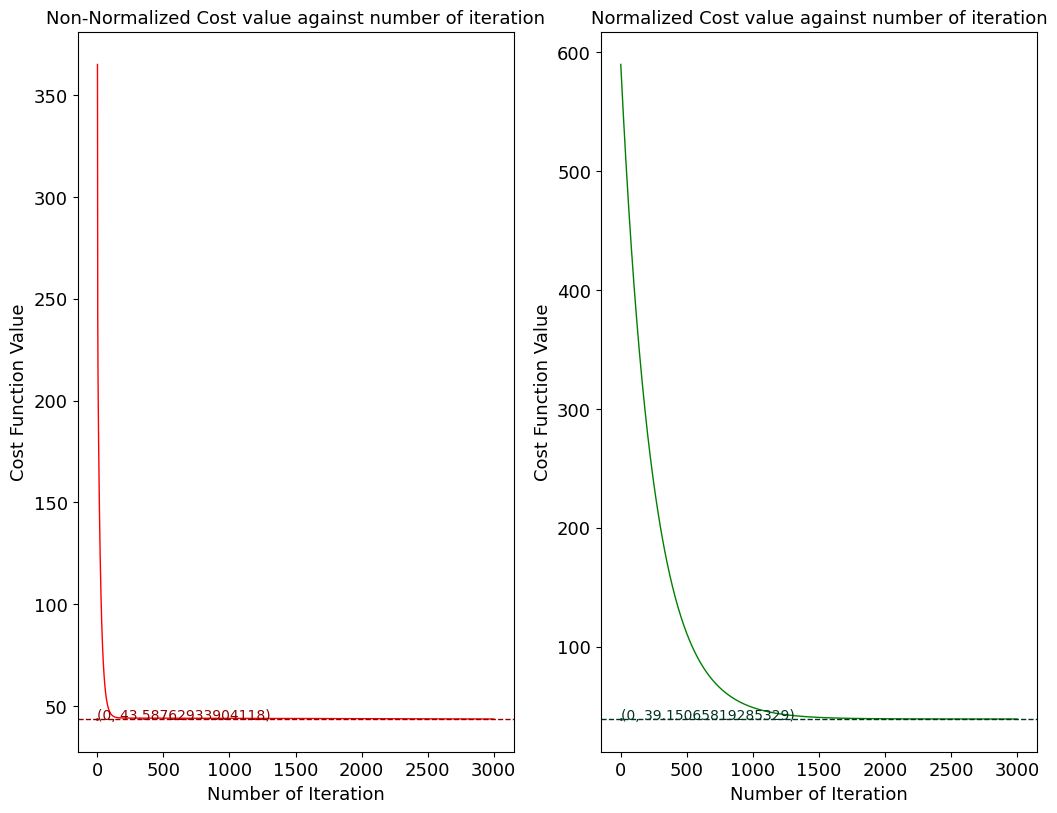

In [6]:
#--- Write your code here ---#
MODEL = RegressionModelGradientDescent(1,0.001,3000)
x_tick = np.arange(1,3001,1)


plt.figure()


plt.subplot(1,2,1)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)


MODEL.fit(Xe,y)
plt.plot(x_tick,MODEL.cost_J,c="red",linewidth = 1)
plt.axhline(y=MODEL.evaluate(Xe,y),c="#8B0000",linestyle = '--',linewidth = 1)
xx=[0]
yy=[MODEL.evaluate(Xe,y)]
plt.scatter(x=xx,y=yy,s=1,c="#8B0000")
plt.text(0,yy[0],(0,yy[0]),c="#8B0000")

plt.title("Non-Normalized Cost value against number of iteration",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)


plt.subplot(1,2,2)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)


MODEL.fit(X_normal,y)
plt.plot(x_tick,MODEL.cost_J,c="green",linewidth = 1)
plt.axhline(y=MODEL.evaluate(X_normal,y),c="#013220",linestyle = '--',linewidth = 1)
yy=[MODEL.evaluate(X_normal,y)]
plt.scatter(x=xx,y=yy,s=1,c="#013220")
plt.text(0,yy[0],(0,yy[0]),c="#013220")


plt.title("Normalized Cost value against number of iteration",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)


plt.show()




Explanation!!!!!!!!!!!!!!!!!

We could summary from the previous normal equation solution that the correct precise answer should have a MSE of 39.14548321146509, but here we see the evolvement of cost functions of non-normalized and normalized one. Clearly that the non-normalized one failed to converge to 39.145.......because its final MSE after 3000 iterations are 43.58.......,which is not the final correct MSE we want. This means that non-normalized one still not converges to the correct beta solution. So this means its converge is very slow. But you could see that for the normalized one after 3000 iterations it finally converges to the MSE very close to the correct MSE we want (39.145..............), which means that it converges faster than the non-normalized one and reaches the final correct beta solution in this 3000 iterations.

6. Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

--- Your answer here --- 


Our approximated cost is 39.536938043579745
At the learning rate of 0.1 ,the number 16 itertion has MSE larger than cost and the number 17 has MSE smaller than cost.
Now we plot the graph with learning rate equals 0.1


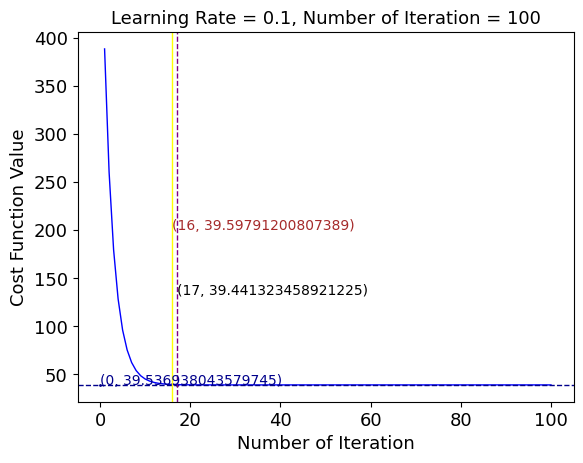

In [7]:
#--- Write your code here ---#
###    We find the 1% larger cost value than the normal equation by multiply 101% of the data in normal equation
model=RegressionModelNormalEquation(1)
model.fit(X_normal,y)
cost = model.evaluate(X_normal,y)
cost = cost * 1.01
print("Our approximated cost is",cost)
###    On the level of learning rate = 0.1
learning_rate = 0.1
MSE_1 = []
iteration = []
for i in range(10,21):
    Model = RegressionModelGradientDescent(1,learning_rate,i)
    Model.fit(X_normal,y)
    mse = Model.evaluate(X_normal,y)
    MSE_1.append(mse)
    if mse < cost:
        iteration.append(i)
MSE_1 = np.array(MSE_1)
MSE_1 = MSE_1.T
print("At the learning rate of",learning_rate,",the number",iteration[0]-1,"itertion has MSE larger than cost and the number",iteration[0],"has MSE smaller than cost.")
print("Now we plot the graph with learning rate equals",learning_rate)
model = RegressionModelGradientDescent(1,learning_rate,100)
model.fit(X_normal,y)
x_tick = np.arange(1,101)
plt.figure()
plt.plot(x_tick,model.cost_J,c="blue",linewidth=1)
plt.axhline(y=cost,c="#00008B",linestyle = '--',linewidth = 1)
xx=[0]
yy=[cost]
plt.scatter(x=xx,y=yy,s=1,c="#00008B")
plt.text(0,yy[0],(0,yy[0]),c="#00008B")
plt.title("Learning Rate = 0.1, Number of Iteration = 100",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)
plt.axvline(x=iteration[0]-1,c="yellow",linestyle = 'solid',linewidth = 1)
xx=[iteration[0]-1]
yy=[MSE_1[6]]
plt.scatter(x=xx,y=yy,s=1,c="brown")
plt.text(xx[0],200,(xx[0],yy[0]),c="brown")
plt.axvline(x=iteration[0],c="purple",linestyle = 'dashed',linewidth = 1)
xx=[iteration[0]]
yy=[MSE_1[7]]
plt.scatter(x=xx,y=yy,s=1,c="black")
plt.text(xx[0],133,(xx[0],yy[0]),c="black")
plt.show()





## Lecture 2, Part 3

1. Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


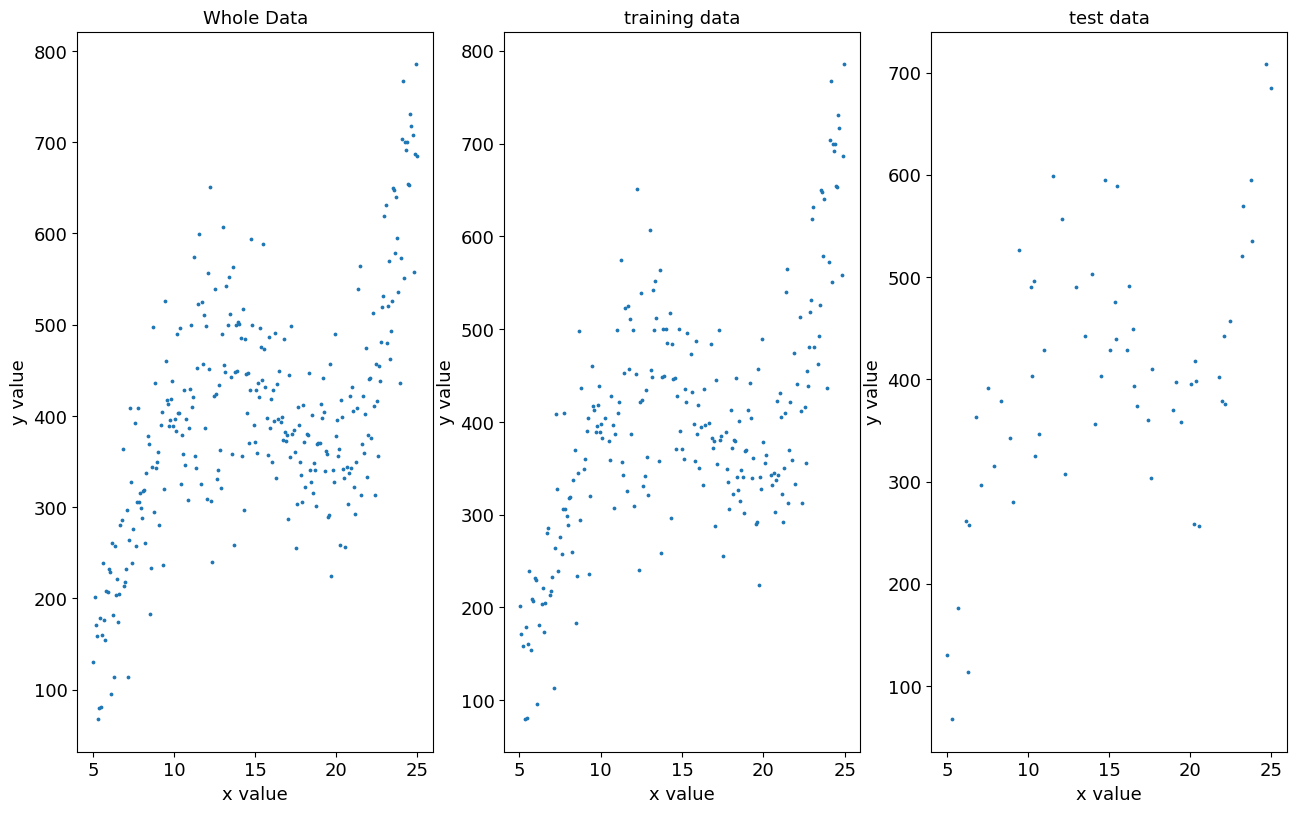

In [8]:
#--- Write your code here ---#
csv = np.genfromtxt("secret_polynomial.csv",delimiter=",",skip_header=1)
np.random.shuffle(csv)
train_data = csv[:240]
test_data = csv[240:]
plt.figure()


plt.subplot(1,3,1)
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.scatter(x=csv[:,0],y=csv[:,1],s=3)
plt.title("Whole Data",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x value",fontsize = 13)
plt.ylabel("y value",fontsize = 13)

plt.subplot(1,3,2)
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.scatter(x=train_data[:,0],y=train_data[:,1],s=3)
plt.title("training data",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x value",fontsize = 13)
plt.ylabel("y value",fontsize = 13)



plt.subplot(1,3,3)
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.scatter(x=test_data[:,0],y=test_data[:,1],s=3)
plt.title("test data",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x value",fontsize = 13)
plt.ylabel("y value",fontsize = 13)


plt.show()


2. Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

--- Your answer here --- 

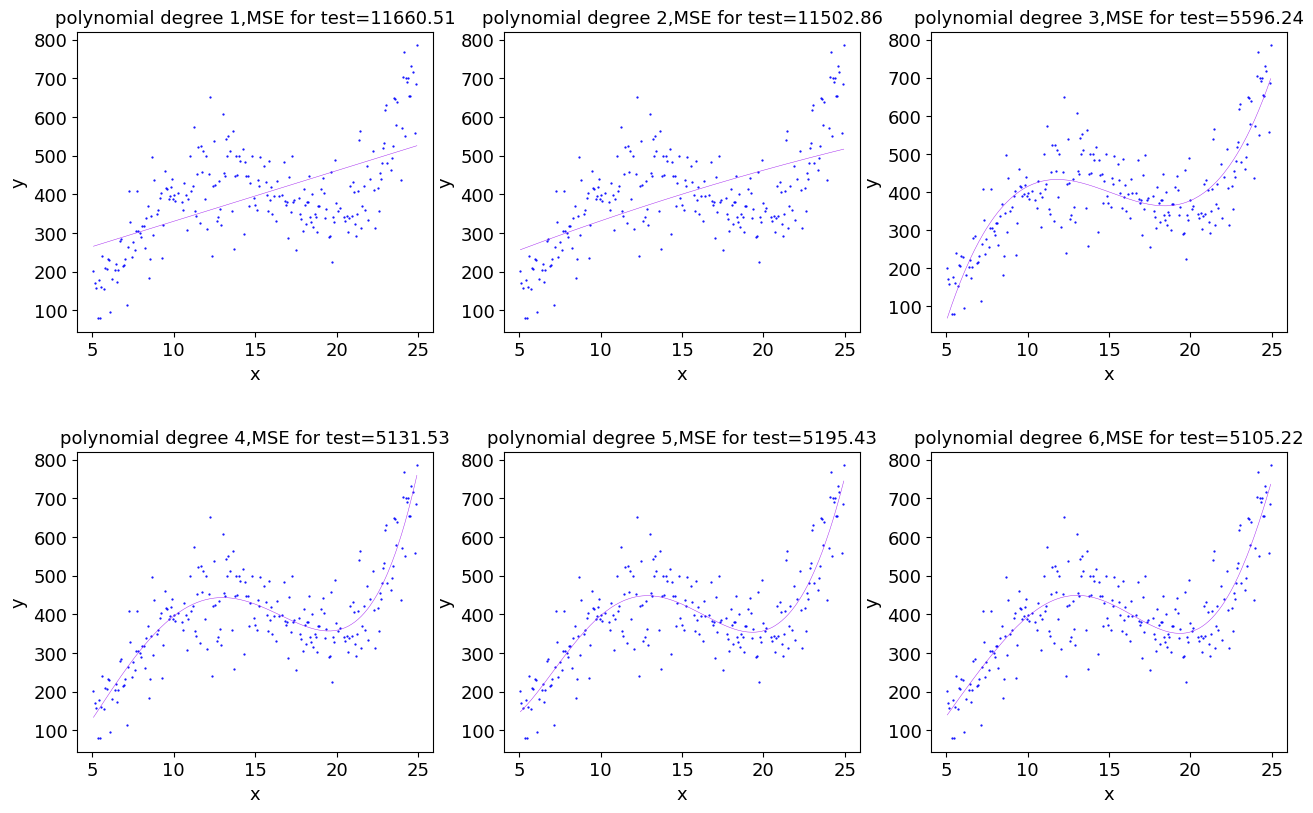

In [9]:
#--- Write your code here ---#
plt.figure()
for i in range (1,7,1):
    plt.subplot(2,3,i)
    plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    train_data = train_data[train_data[:, 0].argsort()]
    model = RegressionModelNormalEquation(i)
    model.fit(train_data[:,0],train_data[:,1])
    y_predict = model.predict(train_data[:,0])
    MSE_test = model.evaluate(test_data[:,0],test_data[:,1])
    MSE_test=np.round(MSE_test,2)
    plt.scatter(x=train_data[:,0],y=train_data[:,1],s=0.3333333333333,color="#0000FF")
    plt.plot(train_data[:,0],y_predict,color="#A020F0",linewidth = 0.3333333333333)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel("x",fontsize = 13)
    plt.ylabel("y",fontsize = 13)
    plt.title(f"polynomial degree {i},MSE for test={MSE_test}",fontsize = 13)
plt.show()

3. To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

--- Your answer here --- 

In [10]:
#--- Write your code here ---#
mse_average_test = []
for i in range(1,7,1):
    Mse_test = []
    for t in range(1,21,1):
        csv = np.genfromtxt("secret_polynomial.csv",delimiter=",",skip_header=1)
        np.random.shuffle(csv)
        train_data = csv[:240]
        test_data = csv[240:]
        train_data = train_data[train_data[:, 0].argsort()]
        model = RegressionModelNormalEquation(i)
        model.fit(train_data[:,0],train_data[:,1])
        MSE_test = model.evaluate(test_data[:,0],test_data[:,1])
        MSE_test=np.round(MSE_test,2)
        Mse_test.append(MSE_test)
    Mse_test_average = sum(Mse_test) / 20
    Mse_test_average = np.round(Mse_test_average,2)
    mse_average_test.append(Mse_test_average)
print("After 20 runs of repeated runs with shuffled data by randomly dividing data, the average calculated MSE for test data is following:")
print("[degree1     degree2     degree3     degree4     degree5     degree6]")
mse_average_test = np.array(mse_average_test)
print(mse_average_test)
for i in range(1,7):
    if mse_average_test[i-1] == mse_average_test.min():
        print("Degree",i,"has the minimum of MSE test data, which is",mse_average_test.min())
    
        

After 20 runs of repeated runs with shuffled data by randomly dividing data, the average calculated MSE for test data is following:
[degree1     degree2     degree3     degree4     degree5     degree6]
[11339.38 11364.03  5162.73  5428.57  4997.98  5112.1 ]
Degree 5 has the minimum of MSE test data, which is 4997.98


From here the best degree is 5 because it has the smallest MSE average cost data compared to other degree in 20 random shuffle of data, here MSE means minimum squared error.

But the reader must know that this answer is not fixed. This is because if we restart the whole jupyter notebook again and make another 20 shuffled data for each degree, the MSE for test data will be totally different because traning set and test set is changing.

But I make relative code here, which means the answer will also change when the jupyter notebook restart again. My answer output will always be the updated one.

But we could conclude from many trials above that degree 1 and 2 are very weak compared to degree 3 to 6, because the average MSE scores for degree 1 and 2 are very large compared to those of degree 3 to 6. We could see that MSE scores for degree 1 and 2 are more than 10000, but those for degree 3 to 6 are only around 5000.

## Lecture 3 - Part 2

1. Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

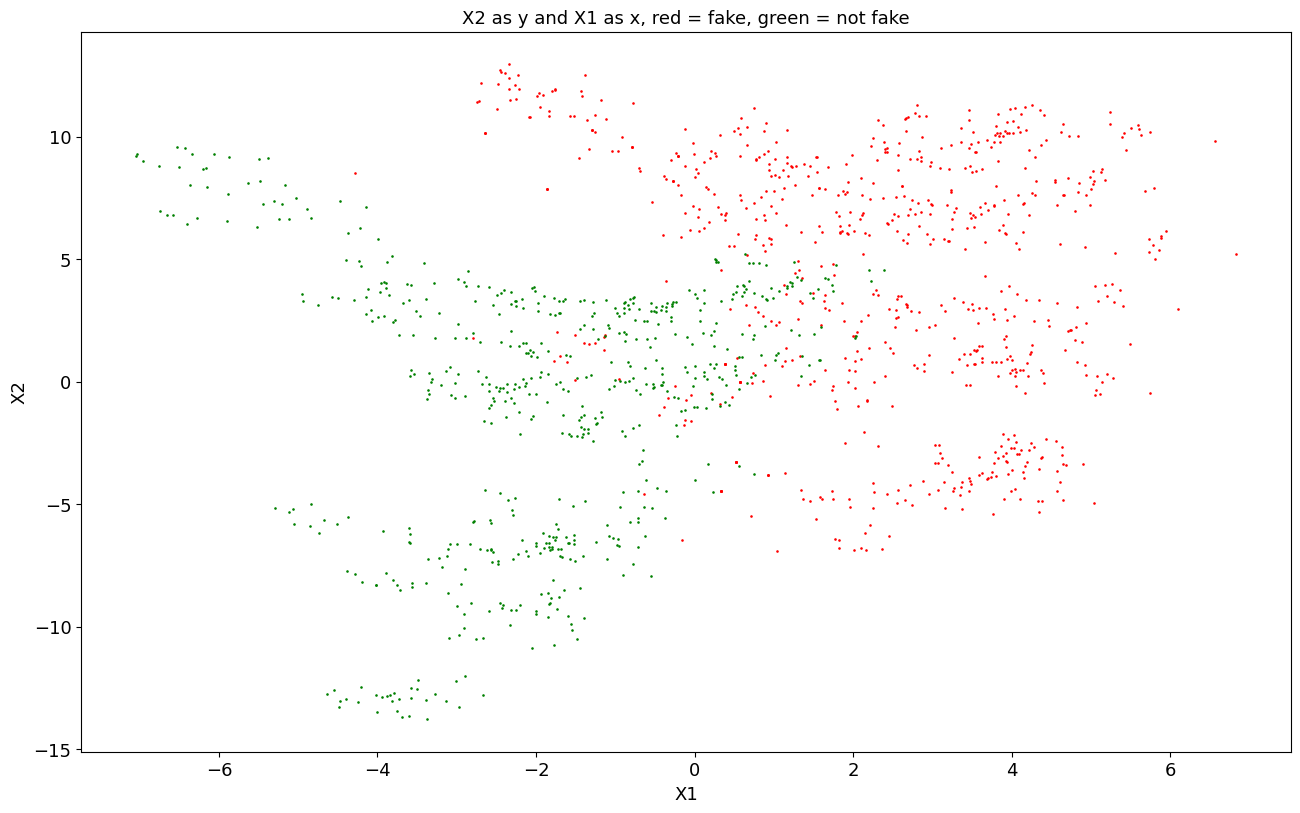

In [11]:
#--- Write your code here ---#
csv = np.genfromtxt("banknote_authentication.csv",delimiter=",")
X1 = csv[:,0]
X2 = csv[:,1]
y = csv[:,2]
X1_normalization = (X1-np.mean(X1))/(np.std(X1))
X2_normalization = (X2-np.mean(X2))/(np.std(X2))
plt.figure()
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
for i in range(len(csv)):
    if y[i] == 0:
        plt.scatter(x=[X1[i]],y=[X2[i]],c="Red",marker=".",s=3)
    elif y[i] == 1:
        plt.scatter(x=[X1[i]],y=[X2[i]],c="green",marker=".",s=3)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("X1",fontsize = 13)
plt.ylabel("X2",fontsize = 13)
plt.title("X2 as y and X1 as x, red = fake, green = not fake",fontsize = 13)
plt.show()

2.  Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [12]:
#--- Write your code here ---#
np.random.shuffle(csv)
validation = csv[:275]
sub_dataset = csv[275:]

3. Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

--- Your answer here --- 



Learning rate matrix: [0.1   0.01  0.005 0.004 0.003 0.002 0.001]
accuracy of num of iteration = 100 [0.8751139471285324, 0.854147675478578, 0.8350045578851413, 0.8295350957155879, 0.8185961713764813, 0.7848678213309025, 0.7556973564266181]
accuracy of num of iteration = 500 [0.8787602552415679, 0.8732907930720146, 0.8696444849589791, 0.8705560619872379, 0.8659981768459435, 0.853236098450319, 0.8350045578851413]
accuracy of num of iteration = 1000 [0.8787602552415679, 0.8751139471285324, 0.8732907930720146, 0.8696444849589791, 0.8696444849589791, 0.8705560619872379, 0.853236098450319]


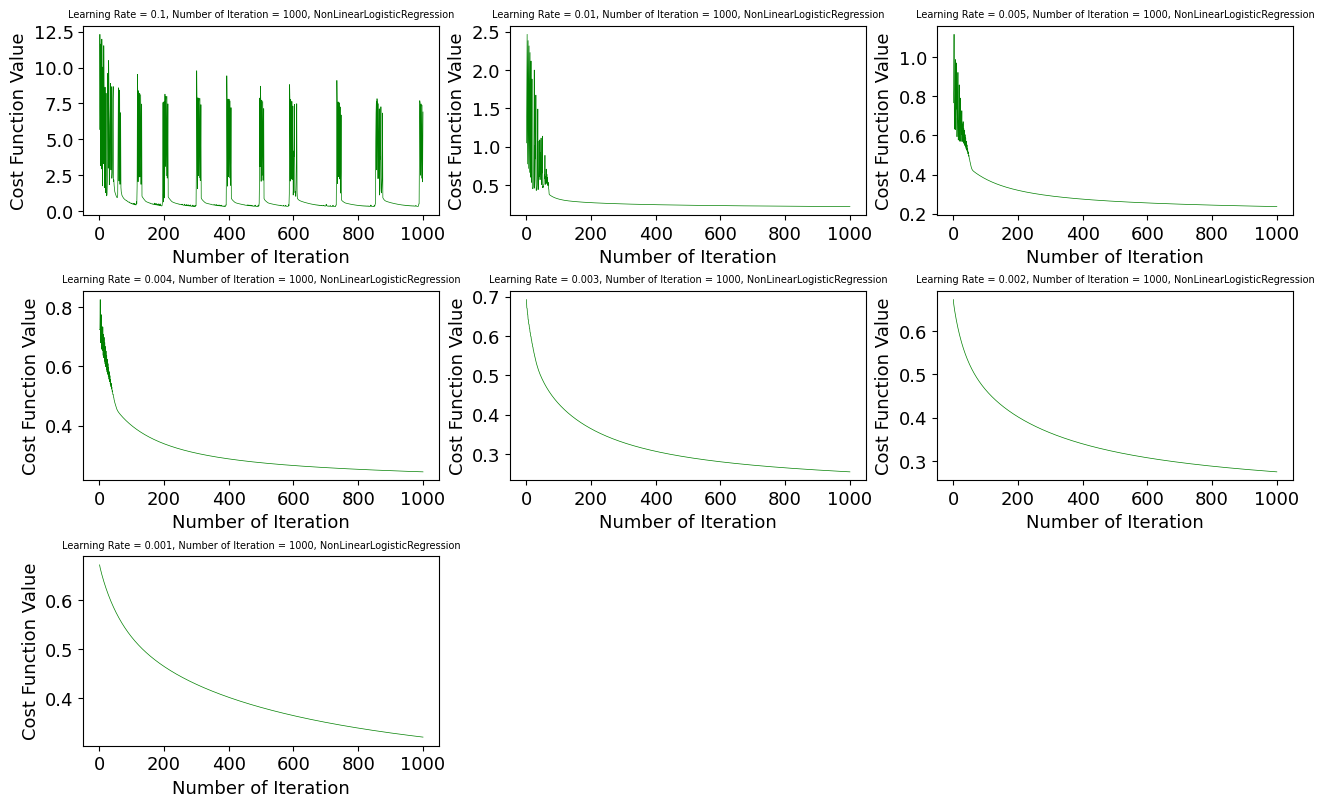

Final Cost Function Value = 0.19258879481282276 for Non-Linear Logistic Regression, no.50000
Final Cost Function Value = 0.19382823282904163 for Non-Linear Logistic Regression, no.=20000


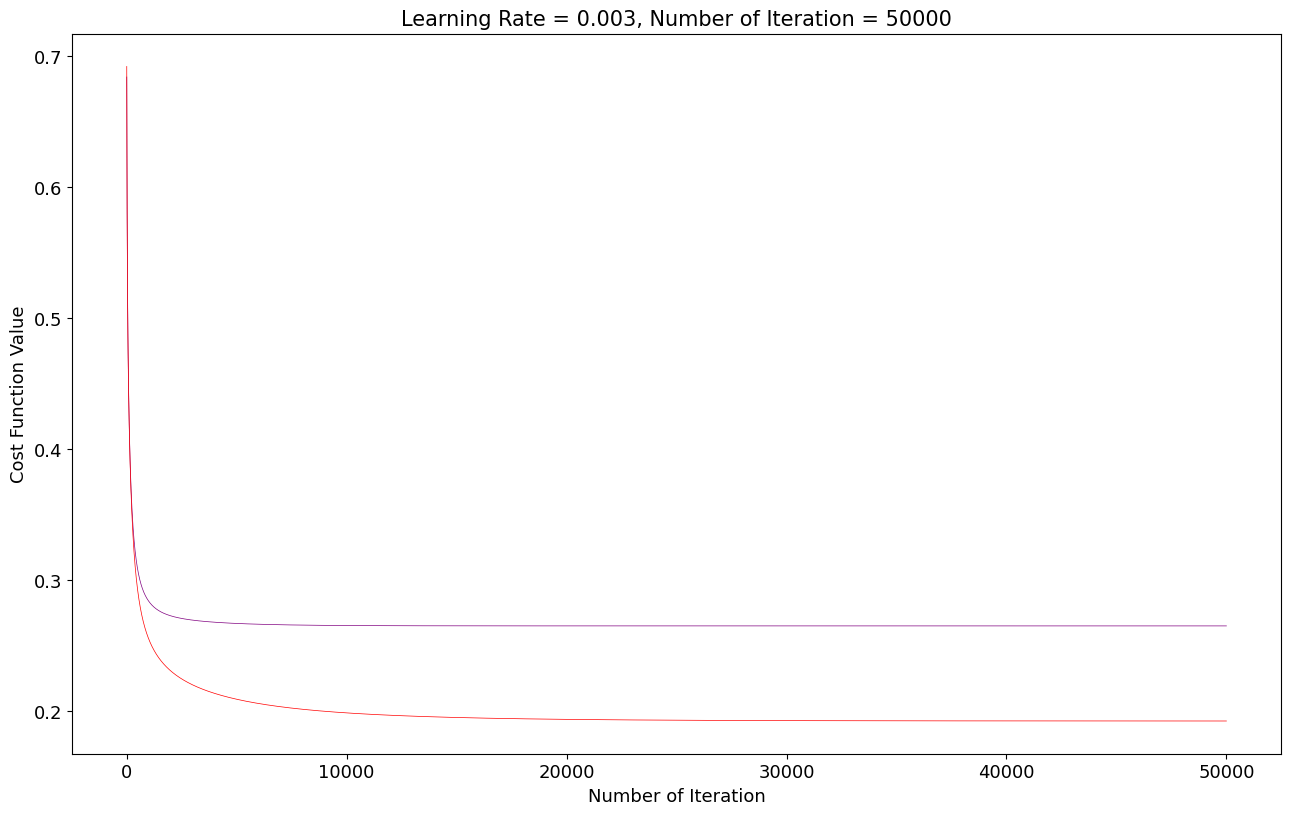

In [13]:
#--- Write your code here ---#
from MachineLearningModel import LogisticRegression
from MachineLearningModel import NonLinearLogisticRegression

X = sub_dataset[:,:2]
#    matrix of learning_rate for choosing 
learning_rate_matrix = np.array([0.1,0.01,0.005,0.004,0.003,0.002,0.001])
print("Learning rate matrix:",learning_rate_matrix)
#    We print out accuracy of many learning_rate with number of iterations = 100
accuracy_100 = []
for l in learning_rate_matrix:
    model = LogisticRegression(l,100)
    model.fit(X,sub_dataset[:,2])
    accuracy_100.append(model.evaluate(X,sub_dataset[:,2]))
print("accuracy of num of iteration = 100",accuracy_100)
#    We print out accuracy of many learning_rate with number of iterations = 500
accuracy_500 = []
for l in learning_rate_matrix:
    model = LogisticRegression(l,500)
    model.fit(X,sub_dataset[:,2])
    accuracy_500.append(model.evaluate(X,sub_dataset[:,2]))
print("accuracy of num of iteration = 500",accuracy_500)
#    We print out accuracy of many learning_rate with number of iterations = 1000
accuracy_1000 = []
for l in learning_rate_matrix:
    model = LogisticRegression(l,1000)
    model.fit(X,sub_dataset[:,2])
    accuracy_1000.append(model.evaluate(X,sub_dataset[:,2]))
print("accuracy of num of iteration = 1000",accuracy_1000)

####
# cost function against number of iteration plot
plt.figure()
xxxxxx = np.arange(1,1000+1)

for i in range(1,8,1):
    plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    plt.subplot(3,3,i)
    model = NonLinearLogisticRegression(2,learning_rate_matrix[i-1],1000)
    model.fit(X,sub_dataset[:,2])
    plt.plot(xxxxxx,model.Cost_J,c="green",linewidth=0.5)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel("Number of Iteration",fontsize = 13)
    plt.ylabel("Cost Function Value",fontsize = 13)
    plt.title(f"Learning Rate = {learning_rate_matrix[i-1]}, Number of Iteration = 1000, NonLinearLogisticRegression",fontsize = 7)
plt.show()


# see final converge for extremely high number of iteration
plt.figure()
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
model = LogisticRegression(0.003,50000)
model.fit(X,sub_dataset[:,2])
xxxxx = np.arange(1,50000+1)
plt.plot(xxxxx,model.Cost_J,c="purple",linewidth=0.5)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)
model = NonLinearLogisticRegression(2,0.003,50000)
model.fit(X,sub_dataset[:,2])
plt.plot(xxxxx,model.Cost_J,c="red",linewidth=0.5)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)
plt.title("Learning Rate = 0.003, Number of Iteration = 50000",fontsize = 15)
print(f"Final Cost Function Value = {model._cost_function(X,sub_dataset[:,2])} for Non-Linear Logistic Regression, no.50000")
model = NonLinearLogisticRegression(2,0.003,20000)
model.fit(X,sub_dataset[:,2])
print(f"Final Cost Function Value = {model._cost_function(X,sub_dataset[:,2])} for Non-Linear Logistic Regression, no.=20000")
plt.show()

Notice!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


From the above test of choices of learning rate and number of iterations, we see that when number of iterations is becoming larger, the accuracy is becoming better. Also when the learning rate is becoming larger, the accuracy is becoming better.

But from the 7 subplots of non-linear logistic regression plot of cost function against number of iteration, we see that when learning rate is large,  there is fluctuation or failed converge in the plot, so we choose the largest learning rate not causing fluctuation, which is 0.003.

Now we should determine number of iteration, the purple line of logistic regression tends to be flat very fast, but for the red non-linear logistic regression, it tends to be flat at around 20000, so our number of iteration should be 20000.

So from this principle, I choose number of iteration = 20000 and learning rate = 0.003.

I have to mention that since larger number of iterations also means longer time of computation for our codes, I don't choose too big number of iterations, 20000 is just the best one.

Final Cost Function Value = 0.26518488986838945 for Logistic Regression
Final Cost Function Value = 0.19382823282904163 for Non-Linear Logistic Regression


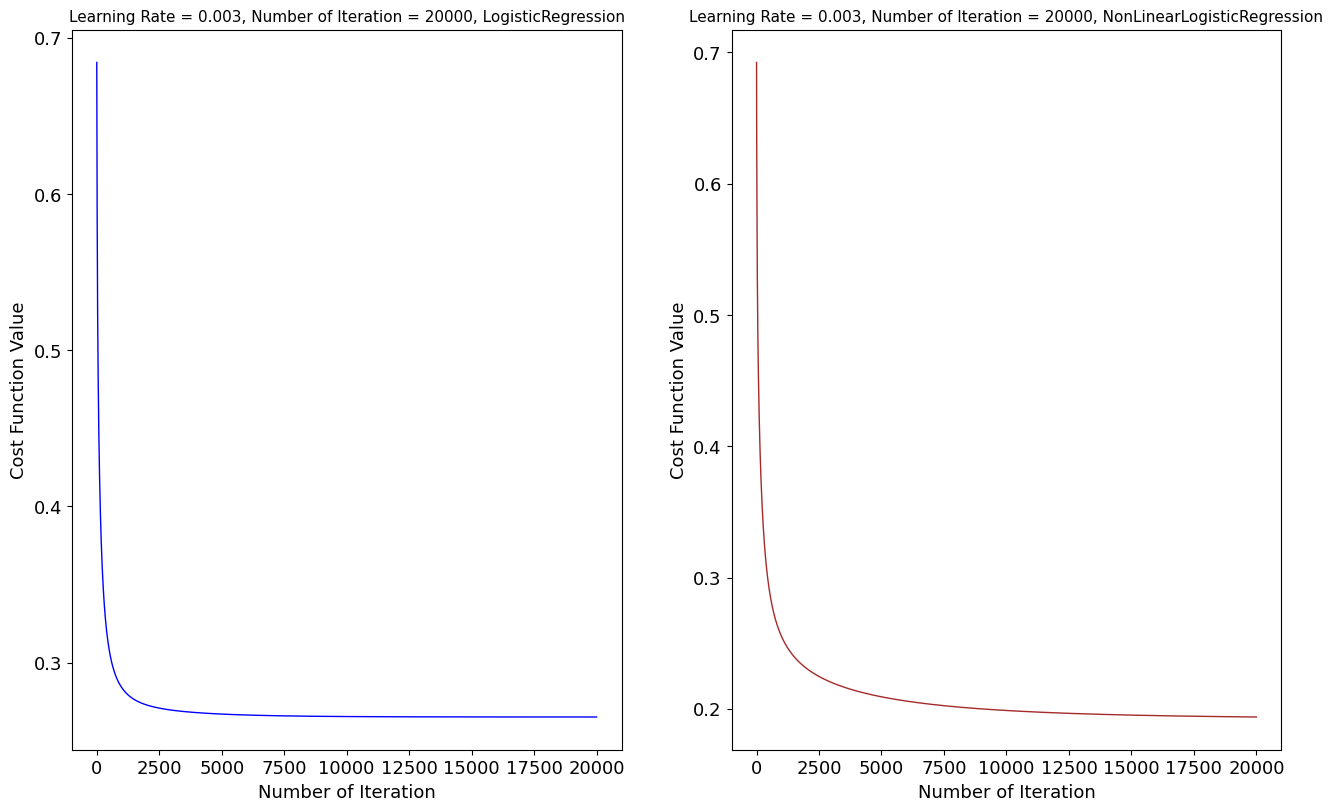

In [14]:
from MachineLearningModel import NonLinearLogisticRegression

learning_rate = 0.003
number_of_iteration = 20000
plt.figure()
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.subplot(1,2,1)
model = LogisticRegression(learning_rate,number_of_iteration)
model.fit(X,sub_dataset[:,2])
x_ticks = np.arange(1,number_of_iteration+1)
plt.plot(x_ticks,model.Cost_J,c="blue",linewidth=1)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)
plt.title(f"Learning Rate = {learning_rate}, Number of Iteration = {number_of_iteration}, LogisticRegression",fontsize = 11)
print(f"Final Cost Function Value = {model._cost_function(X,sub_dataset[:,2])} for Logistic Regression")
plt.subplot(1,2,2)
model = NonLinearLogisticRegression(2,learning_rate,number_of_iteration)
model.fit(X,sub_dataset[:,2])
plt.plot(x_ticks,model.Cost_J,c="brown",linewidth=1)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Number of Iteration",fontsize = 13)
plt.ylabel("Cost Function Value",fontsize = 13)
plt.title(f"Learning Rate = {learning_rate}, Number of Iteration = {number_of_iteration}, NonLinearLogisticRegression",fontsize = 11)
print(f"Final Cost Function Value = {model._cost_function(X,sub_dataset[:,2])} for Non-Linear Logistic Regression")
plt.show()




4. Create a method that, given the sub-dataset, it will randomly split it into 80% for training and 20% for testing.

In [15]:
def split(sub_dataset):
    np.random.shuffle(sub_dataset)
    training = sub_dataset[:int(len(sub_dataset)*0.8)]
    test = sub_dataset[int(len(sub_dataset)*0.8):]
    return training,test

5. Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

--- Your answer here --- 

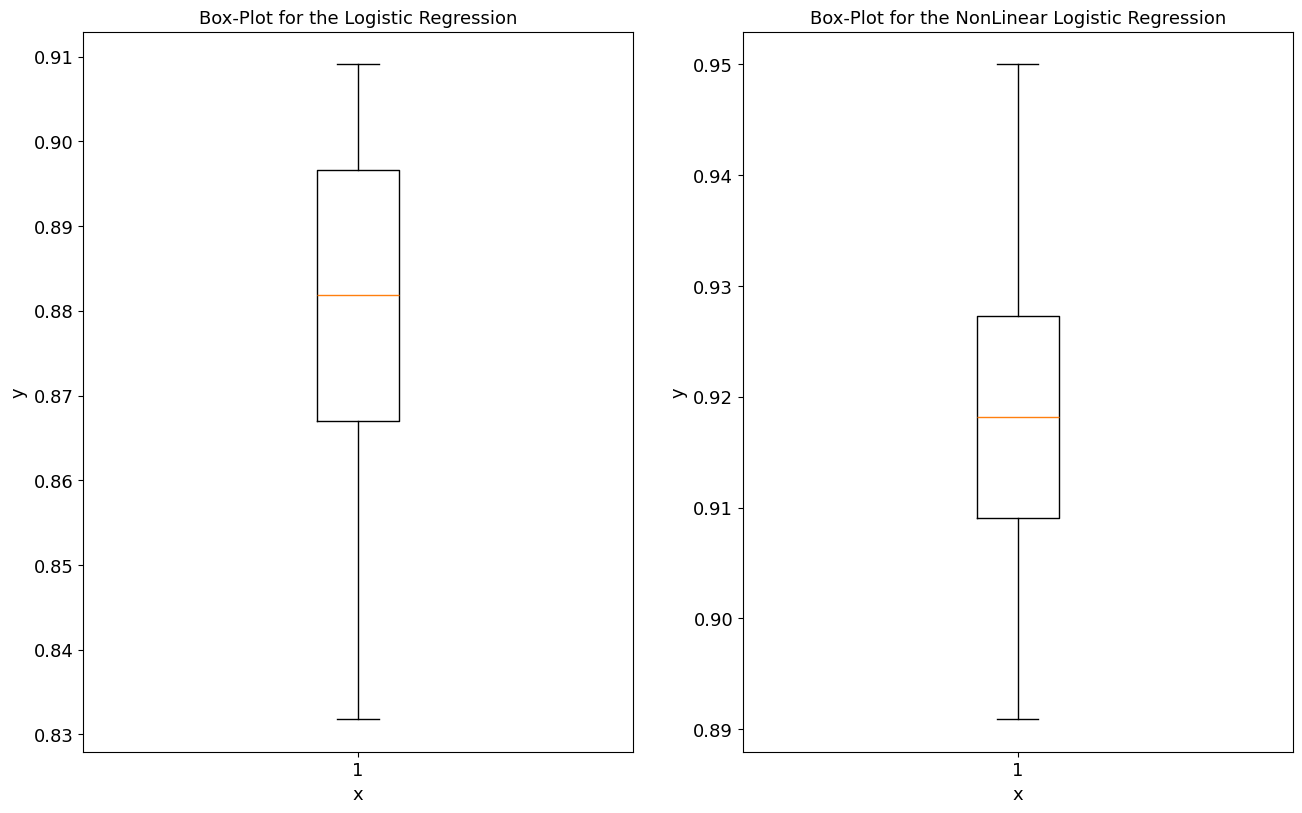

In [16]:
#--- Write your code here ---#
Accuracy_of_Logistic = []
Accuracy_of_NonLinearLogistic = []
for i in range(1,21,1):
    np.random.seed(i)
    training,test = split(sub_dataset)
    model = LogisticRegression(learning_rate,number_of_iteration)
    model.fit(training[:,:2],training[:,2])
    score_1 = model.evaluate(test[:,:2],test[:,2])
    Accuracy_of_Logistic.append(score_1)
    model = NonLinearLogisticRegression(2,learning_rate,number_of_iteration)
    model.fit(training[:,:2],training[:,2])
    score_2 = model.evaluate(test[:,:2],test[:,2])
    Accuracy_of_NonLinearLogistic.append(score_2)
Accuracy_of_Logistic = np.array(Accuracy_of_Logistic)
Accuracy_of_NonLinearLogistic = np.array(Accuracy_of_NonLinearLogistic)
plt.figure()
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.subplot(1,2,1)
plt.boxplot(Accuracy_of_Logistic)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.title("Box-Plot for the Logistic Regression",fontsize = 13)
plt.subplot(1,2,2)
plt.boxplot(Accuracy_of_NonLinearLogistic)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.title("Box-Plot for the NonLinear Logistic Regression",fontsize = 13)
plt.show()

Notice!!!!!!!!!!!!!!!!!!!!!!

They are not qualitatively the same. The 2 below is the explanation.

1. First of all, from the above and above plot of cost function evolvement against number of iteration for both model. We see that, when learning rate is 0.003 and number of iteration is 20000, the final MSE for Logistic Regression is 0.26518488986838945 but the final MSE for NonLinear Logistic Regression is 0.19382823282904163, which means that NonLinear Logistic Regression has smaller training error with better Beta answer. So NonLinear Logistic Regression is qualitatively better.

2. Secondly, from the above Box-Plot for both models, it is easy to see that NonLinear Logistic Regression has better performance of higher average Test Accuracy, which is depicted by the horizonal yellow line. Also when we evaluate the centralized box, we see that the lowest accuracy value of NonLinear Logistic Value is higher than the highest accuracy value of Logistic Regression. So under so many repeated times of evaluation, NonLinear Logistic Regression is better in terms of quality.

6. Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

--- Your answer here --- 

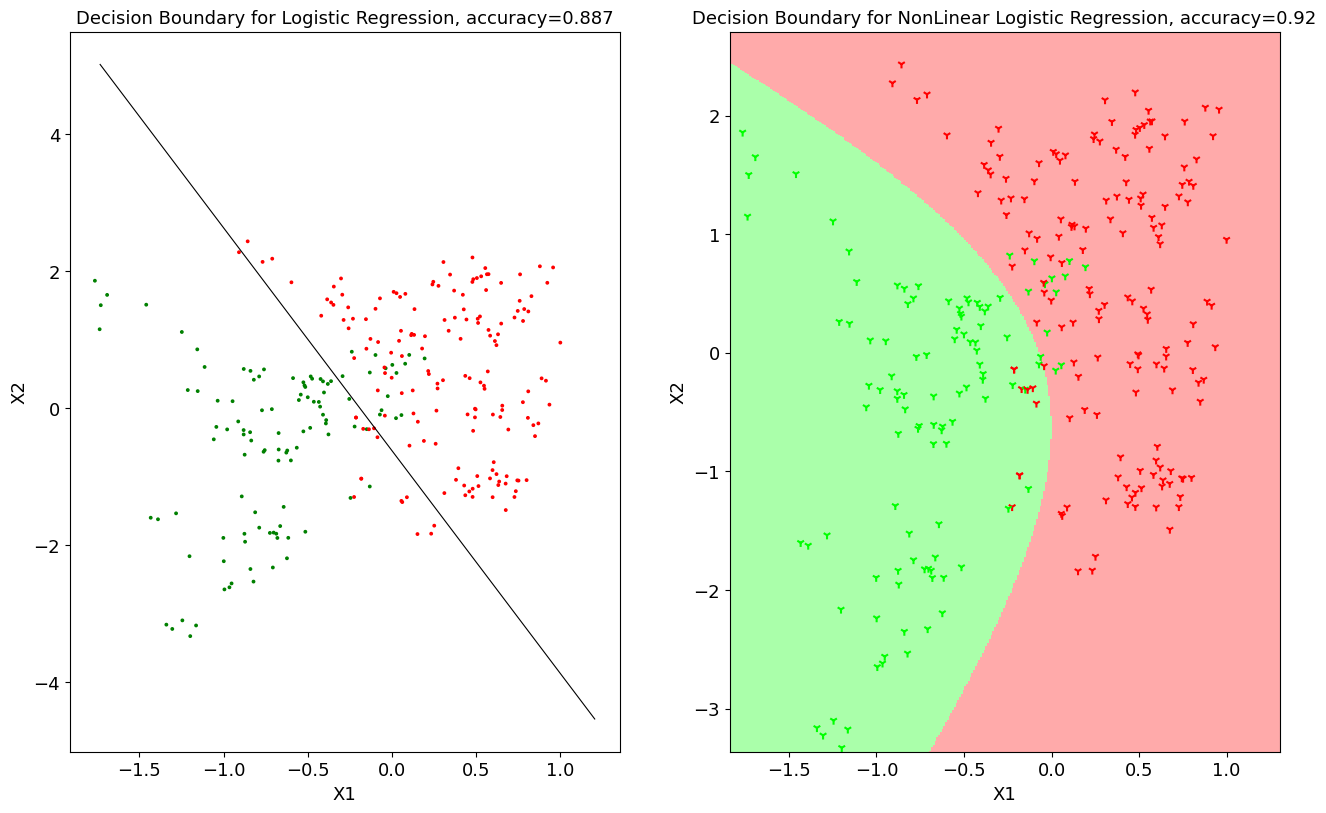

In [17]:
#--- Write your code here ---#
###    normalize the data
from DecisionBoundary import plotDecisionBoundary


csv = np.genfromtxt("banknote_authentication.csv",delimiter=",")
np.random.shuffle(csv)
validation = csv[:275]
validation_X = validation[:,:2]
validation_y = validation[:,2]
sub_dataset = csv[275:]
sub_dataset_X = sub_dataset[:,:2]
sub_dataset_y = sub_dataset[:,2]
validation_normal_X = (validation_X-np.mean(validation_X))/(np.std(validation_X))
sub_dataset_normal_X = (sub_dataset_X-np.mean(sub_dataset_X))/(np.std(sub_dataset_X))



###    set up learning rate and number of iteration
learning_rate = 0.003
number_of_iteration = 20000


###    plot
plt.figure()
plt.subplots_adjust(left=0.01, right=1.9, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
plt.subplot(1,2,1)




model = LogisticRegression(learning_rate,number_of_iteration)
model.fit(sub_dataset_normal_X,sub_dataset_y)
Beta = model.Beta



sub_dataset_normal_X_order = sub_dataset_normal_X[sub_dataset_normal_X[:, 0].argsort()]
X1 = sub_dataset_normal_X_order[:,0]





plt.plot(X1,(-(Beta[0]+Beta[1]*X1)/Beta[2]),c="black",linewidth = 0.8)
color = []
for i in range(len(validation_y)):
    if validation_y[i]==0:
        color.append("red")
    if validation_y[i]==1:
        color.append("green")
plt.scatter(validation_normal_X[:,0],validation_normal_X[:,1],c=color,marker="o",s=3)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("X1",fontsize = 13)
plt.ylabel("X2",fontsize = 13)
accuracy = model.evaluate(validation_normal_X,validation_y)
accuracy = np.round(accuracy,3)
plt.title(f"Decision Boundary for Logistic Regression, accuracy={accuracy}",fontsize = 13)




plt.subplot(1,2,2)



model = NonLinearLogisticRegression(2,learning_rate,number_of_iteration)
model.fit(sub_dataset_normal_X,sub_dataset_y)
accuracy = model.evaluate(validation_normal_X,validation_y)
accuracy = np.round(accuracy,3)
plt.title(f"Decision Boundary for NonLinear Logistic Regression, accuracy={accuracy}",fontsize = 13)
plt.scatter(validation_normal_X[:,0],validation_normal_X[:,1],c=color,marker="o",s=3)
plotDecisionBoundary(sub_dataset_normal_X[:,0],sub_dataset_normal_X[:,1],validation_y,model,validation_normal_X[:,0],validation_normal_X[:,1])
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("X1",fontsize = 13)
plt.ylabel("X2",fontsize = 13)
plt.show()

Notice!!!!!!!!!!!!!!!!!!!!!!!!!!

1. Accuracy:

Similarity:

Both models' accuracies are relatively high, which can exceed 0.88.

Difference:

The accuracy of NonLinear Logistic Regression is even higher than that of Logistic Regression, this is because with higher degree the model can fit the binary classification better.

2. Decision Boundary:

Similarity:

Both decision boundaries of the two models separate the graph into two parts, where the left green one is meaning not fake and the right red one is meaning fake.

Difference:

Decision Boundary of NonLinear Logistic Regression can fit the sub-data set better because its shape is a curve, which could classify more points correctly compared to just a single straight line of the Logistic Function.

## Lecture 4, Part 2

1. Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [18]:
from ForwardSelection import ForwardSelection
from ROCAnalysis import ROCAnalysis

data = np.genfromtxt('./datasets/heart_disease_cleveland.csv', delimiter=',', skip_header=1) 
X = data[:, :-1]  # Features
y = data[:, -1]   # Target variable
X_normal=(X-np.average(X))/np.std(X)
model=ForwardSelection(X_normal,y,LogisticRegression(0.01,3000))
X_subdataset, X_validation, y_subdataset, y_validation = model.create_split(X_normal, y)

2. Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

--- Your answer here --- 

Since too big learning rate will cause failure of converging to the answer and too small learning rate will cause much long time for calculation. So learning rate = 0.01 is reasonable for choice.

Since too many numbers of iteration will get better results but also longer time calculation, so number of iteration = 3000 is reasonable for choice.

In [19]:
#--- Write your code here ---#
model=ForwardSelection(X_subdataset,y_subdataset,LogisticRegression(0.01,3000))
model.forward_selection()
select=model.model_to_choose
f_score=model.max_f_score
print("The best forward selection model is",select,",the optimized corresponding f score is:",f_score)
all_features=np.arange(0,13,1)
f_score_all_metrics=model.train_model_with_features(all_features)
print("The model with all features selected has a f score of:",f_score_all_metrics)
model.fit()
beta=model.beta
print("The beta prefix number for the selected model is:",beta)
print("Feature index begins from 0:")
for i in range(len(select)):
    print("Featrure index:",select[i],"Beta coefficient:",beta[i])
if f_score>f_score_all_metrics:
    print("The selected model is better than the model with all metrics included.")
elif f_score<f_score_all_metrics:
    print("The selected model is worse than the model with all metrics included.")
else:
    print("The selected model is euqal to the model with all metrics included regarding to the f score performance.")
all_feature=np.array(['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
selected_feature=all_feature[select]
print("The selected feature in the optimization model is:",selected_feature)


c:\Users\yishu\Desktop\University Life\Start of University of Macau\Couse Material (important)\2023,2024-2-Linnaeus University Sweden\2DV516\Assignment2\yy222cm_A2\ROCAnalysis.py:81: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)
c:\Users\yishu\Desktop\University Life\Start of University of Macau\Couse Material (important)\2023,2024-2-Linnaeus University Sweden\2DV516\Assignment2\yy222cm_A2\ROCAnalysis.py:83: RuntimeWarning: invalid value encountered in scalar divide
  f_score = 2*((precision*tp_rate)/(precision+tp_rate))


The selected feature matrix is [0] ,which has 1 feature. And its f_score is: 0.0
The selected feature matrix is [0 2] ,which has 2 features. And its f_score is: 0.0
The selected feature matrix is [0 2 3] ,which has 3 features. And its f_score is: 0.0
The selected feature matrix is [0 2 3 4] ,which has 4 features. And its f_score is: 0.0
The selected feature matrix is [0 2 3 4 5] ,which has 5 features. And its f_score is: 0.0
The selected feature matrix is [0 2 3 4 5 6] ,which has 6 features. And its f_score is: 0.0
The selected feature matrix is [0 2 3 4 5 6 7] ,which has 7 features. And its f_score is: 0.3448275862068966
The selected feature matrix is [0 2 3 4 5 6 7 8] ,which has 8 features. And its f_score is: 0.34285714285714286
The selected feature matrix is [0 2 3 4 5 6 7 8 9] ,which has 9 features. And its f_score is: 0.30303030303030304
The selected feature matrix is [ 0  2  3  4  5  6  7  8  9 10] ,which has 10 features. And its f_score is: 0.368421052631579
The selected featur

here the chosen model is [ 0  2  3  4  5  6  7  8  9 10 11]: ['age' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang' 'oldpeak'
 'slope' 'ca']. Compared to  the original model with all metrics considered, only sex and thal are excluded. Sex are excluded because there isn't a certainty that men will get heart disease more easily than women or vice versa. Thal can be excluded because the condition of the blood disorder called thalassemia is overlapped and can be intepreted and substituted by other blood data like thalach or slope, etc. So it should be excluded.

3. Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

--- Your answer here --- 

In [20]:
#--- Write your code here ---#
y_predict_validation=model.predict(X_validation)
model_validation=ROCAnalysis(y_predict_validation,y_validation)
tp_rate=model_validation.tp_rate()
fp_rate=model_validation.fp_rate()
precision=model_validation.precision()
f_score_validation=model_validation.f_score()
print(f"tp rate: {tp_rate}, fp rate: {fp_rate}, precision: {precision}, f score validation: {f_score_validation}")


tp rate: 0.4838709677419355, fp rate: 0.03333333333333333, precision: 0.9375, f score validation: 0.6382978723404255


The precision of 0.9375 is relatively very high, so regarding precision, this feature forward selection doen't lose any precision.

However, the true positive rate here is only around 0.5, which means there isn't a high probability that instances can be correctly predicted as positive. So it means this model is not strong in finding true heart diseases when there is actually a heart disease.

But the false posotive rate is as small as 0.033333333, which means the false positive rate is extremely low. This means this model is very strong in preventing the case that instances incorrectly predicted as positive when they are actually negative. This means negative is very unlikely considered as positive in this model.

since we get precision up to 0.93 but the f-score is only around 0.64, so it means we get a relatively low recall or sensitivity, which means this model is not very strong in detecting all postitive cases. And this has been verified in above true positive rate.